<h2>NAGA VENKATA SATYA AJAY KUMAR AMPAJALAPU </h2>

<h2> THE SPARKS FOUNDATION GRIPJULY21 INTERNSHIP </h2>

<h2> TASK - 1 </h2>

## Prediction using Supervised ML

<h3><i> Importing Libraries</i></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h3><i> Loading Data</i></h3>

In [2]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h3><i> Checking for Null values</i></h3>

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h3><i> Checking for Outliers</i></h3>

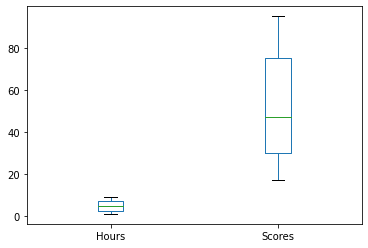

In [7]:
data.plot(kind='box')
plt.show()

<h3><i> Plotting Data</i></h3>

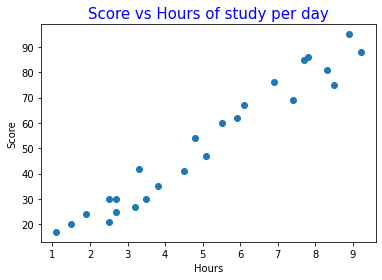

In [8]:
plt.scatter(data['Hours'],data['Scores'])
plt.title('Score vs Hours of study per day',c='b',fontsize=15)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

From the above scatter plot we can clearly say that there is a positive linear relation between hours studied and percentage of score.

<h3><i> Finding Correlation between Study Hours and Scores</i></h3>

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The pearson correlation coefficient between hours studied and percentage of score is 0.976

<h3><i> Splitting data into Training and Testing sets</i></h3>

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.Hours,data.Scores,test_size=0.2)

In [11]:
print(len(x_train),'\n',len(x_test))

20 
 5


<h3><i> Creating and Training the model using Training set </i></h3>

In [12]:
model=LinearRegression()
model.fit(np.array(x_train).reshape(-1, 1),y_train)

LinearRegression()

<h3><i> Plotting the Linear Regression model </i></h3>

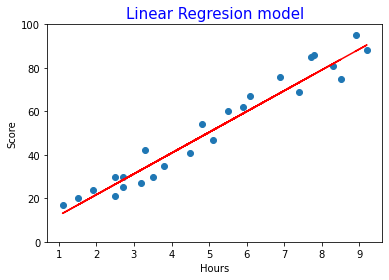

In [13]:
y = (model.coef_ * x_train) + (model.intercept_)

plt.scatter(data.Hours,data.Scores)
plt.plot(x_train,y,color='r')
plt.ylim(0,100)
plt.title('Linear Regresion model',c='b',fontsize=15)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

<h3><i> Testing model accuracy</i></h3>

In [14]:
y_predicted=model.predict(np.array(x_test).reshape(-1, 1))

In [15]:
df=pd.DataFrame({'X values':x_test,'Y actual':y_test,'Y predicted':y_predicted})
df

,X values,Y actual,Y predicted
16,2.5,30,26.456096
23,6.9,76,68.535172
10,7.7,85,76.185913
18,6.1,67,60.884431
8,8.3,81,81.923969


In [16]:
model.score(np.array(x_test).reshape(-1,1),y_test)

0.9063326531069941

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
print('MSE : {:0.2f}'.format(mean_squared_error(df['Y actual'],df['Y predicted'])))
print("R Squared: %.2f" %r2_score(df['Y actual'],df['Y predicted']))

MSE : 36.84
R Squared: 0.91


<h3><i> Predicting the percentage score for a student who studies for 9.25 hrs/day  </i></h3>

In [19]:
predicted_score=model.predict([[9.25]])

In [20]:
print(f'The Predicted percentage score : {round(predicted_score[0])}')   # I rounded the predicted score to integer

The Predicted percentage score : 91
